## Заполнение пустых ячеек

Почти все столбцы, кроме passengerId, содержат пустые ячейки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from collections import Counter
sns.set() 

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train_test_data = [train, test]

##### CryoSleep, VIP, Transported

In [4]:
print(Counter(train['CryoSleep']))
bool_features = ['CryoSleep', 'VIP']
for dataset in train_test_data:
    for i in dataset.index:
        for feature in bool_features:
            if dataset.loc[i, feature] not in [True,False]:
                dataset.loc[i, feature] = random.choice([True,False])
Counter(train['CryoSleep'])

Counter({False: 5439, True: 3037, nan: 217})


Counter({False: 5550, True: 3143})

##### HomePlanet, Destination

In [5]:
train['HomePlanet'] = train['HomePlanet'].fillna(random.choice(['Mars','Earth','Europa']))
test['HomePlanet'] = test['HomePlanet'].fillna(random.choice(['Mars','Earth','Europa']))
train['Destination'] = train['Destination'].fillna(random.choice(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']))
test['Destination'] = test['Destination'].fillna(random.choice(['TRAPPIST-1e','PSO J318.5-22','55 Cancri e']))

##### Age, Age_group, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [6]:
list_of_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in list_of_features:
    train[feature] = train[feature].fillna(train[feature].mean())
    test[feature] = test[feature].fillna(test[feature].mean())
    
train['Age_group'] = pd.cut(train['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)
test['Age_group'] = pd.cut(test['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)

##### Cabin

In [7]:
deck = []
side = []
deck_t = []
side_t = []
for i in train.index:
    if str(train.loc[i,"Cabin"]) == 'nan':
        deck.append(random.choice(['B','C']))
        side.append(random.choice(['S','P']))
    else:  
        deck.append(train.loc[i,"Cabin"][0])
        side.append(train.loc[i,'Cabin'][-1])
for i in test.index:
    if str(test.loc[i,"Cabin"]) == 'nan':
        deck_t.append(random.choice(['B','C']))
        side_t.append(random.choice(['S','P']))
    else:  
        deck_t.append(test.loc[i,"Cabin"][0])
        side_t.append(test.loc[i,'Cabin'][-1])

train['Deck'] = deck
train['Side'] = side
test['Deck'] = deck_t
test['Side'] = side_t

##### Drop Cabin, Name

In [8]:
train = train.drop(columns=['Cabin', 'Name'])
test = test.drop(columns=['Cabin', 'Name'])

In [9]:
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Age_group       0
Deck            0
Side            0
dtype: int64

## Отбор признаков

Введём новый признак TotalMoney отвечающий за траты пассажира

In [10]:
train['TotalMoney'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['TotalMoney'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

<Axes: xlabel='Transported', ylabel='TotalMoney'>

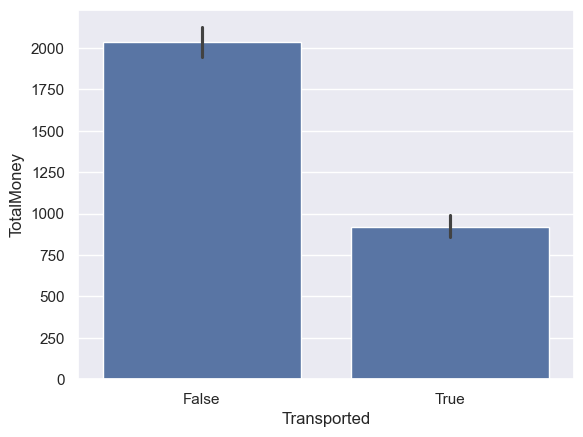

In [11]:
sns.barplot(x='Transported', y='TotalMoney', data=train)

##### Side 

In [12]:
side_dict = {'P': 0, 'S': 1}
train['Side'] = train['Side'].apply(lambda x: side_dict.get(x))
test['Side'] = test['Side'].apply(lambda x: side_dict.get(x))

##### CryoSleep, VIP, Transported

In [13]:
bool_mapping = {'False': 0, 'True': 1}
bool_features = ['CryoSleep', 'VIP']

for name in bool_features:
    train[name] = train[name].astype(int)
    test[name] = test[name].astype(int)
train['Transported'] = train['Transported'].astype(int)

In [14]:
# Будем использовать Age_group вместо Age
train = train.drop(columns='Age')
test = test.drop(columns='Age')
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_group,Deck,Side,TotalMoney
0,0001_01,Europa,0,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,0,3,B,0,0.0
1,0002_01,Earth,0,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,1,2,F,1,736.0
2,0003_01,Europa,0,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,0,5,A,1,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,0,3,A,1,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,1,1,F,1,1091.0


### RoomService, Spa, VRDeck, TotalMoney, FoodCourt, ShoppingMall

In [15]:
num_col = ['RoomService', 'Spa', 'VRDeck', 'TotalMoney', 'FoodCourt', 'ShoppingMall']
for col in num_col:
  train[col] = (train[col] - train[col].min()) / (train[col].max() - train[col].min())
  test[col] = (test[col] - test[col].min()) / (test[col].max() - test[col].min())

### HomePlanet, Destination, Deck

In [16]:
from sklearn.preprocessing import LabelEncoder

ohe_col = ['HomePlanet', 'Destination', 'Deck', 'Age_group']

def label_encoder(train, test, columns):
    for col in columns:
        train[col] = train[col].astype(str)
        test[col] = test[col].astype(str)
        train[col] = LabelEncoder().fit_transform(train[col])
        test[col] =  LabelEncoder().fit_transform(test[col])
    return train, test

train1, test1 = label_encoder(train, test, ohe_col)

<Axes: >

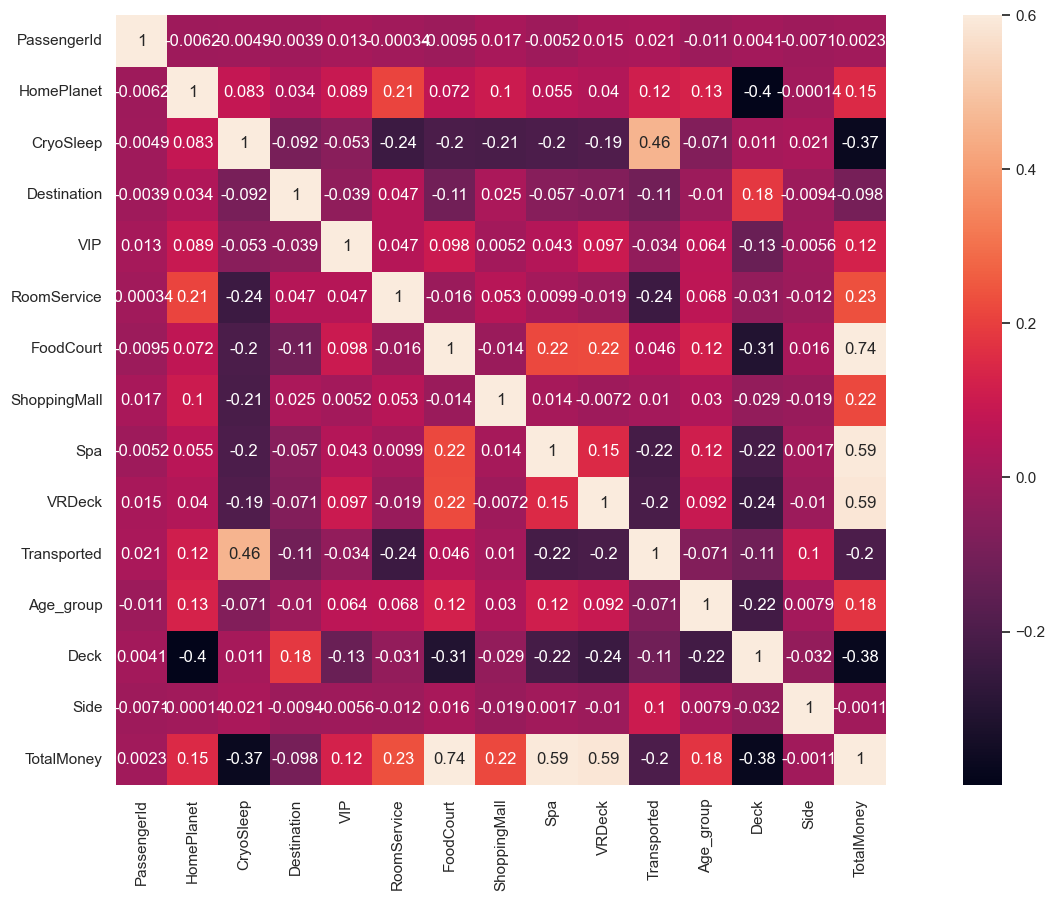

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)

Столбцы с наибольшим влиянием: CryoSleep, RoomService, Spa, VRDeck, TotalMoney

Столбцы с наименьшим влиянием:  VIP, FoodCourt, ShoppingMall, они не нужны в признаках

In [18]:
train = pd.get_dummies(train, columns=ohe_col)
test = pd.get_dummies(test, columns=ohe_col)

In [19]:
drop_col = ['VIP', 'FoodCourt', 'ShoppingMall']
train = train.drop(columns=drop_col)
test = test.drop(columns=drop_col)

## Итог

In [20]:
train.head()

,PassengerId,CryoSleep,RoomService,Spa,VRDeck,Transported,Side,TotalMoney,HomePlanet_0,HomePlanet_1,...,Deck_6,Deck_7,Age_group_0,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Age_group_5,Age_group_6,Age_group_7
0,0001_01,0,0.000000,0.000000,0.000000,0,0,0.000000,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0002_01,0,0.007608,0.024500,0.001823,1,1,0.020452,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0003_01,0,0.003001,0.299670,0.002030,0,1,0.288521,False,True,...,False,False,False,False,False,False,False,True,False,False
3,0003_02,0,0.000000,0.148563,0.007997,0,1,0.143830,False,True,...,False,False,False,False,False,True,False,False,False,False
4,0004_01,0,0.021149,0.025214,0.000083,1,1,0.030317,True,False,...,False,False,False,True,False,False,False,False,False,False


In [21]:
test.head()

,PassengerId,CryoSleep,RoomService,Spa,VRDeck,Side,TotalMoney,HomePlanet_0,HomePlanet_1,HomePlanet_2,...,Deck_6,Deck_7,Age_group_0,Age_group_1,Age_group_2,Age_group_3,Age_group_4,Age_group_5,Age_group_6,Age_group_7
0,0013_01,1,0.000000,0.000000,0.000000,1,0.000000,True,False,False,...,True,False,False,False,True,False,False,False,False,False
1,0018_01,0,0.000000,0.142260,0.000000,1,0.084120,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0019_01,1,0.000000,0.000000,0.000000,1,0.000000,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0021_01,0,0.000000,0.009121,0.026266,1,0.220341,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,0023_01,0,0.000865,0.000000,0.000000,1,0.019159,True,False,False,...,False,False,False,True,False,False,False,False,False,False


<Axes: >

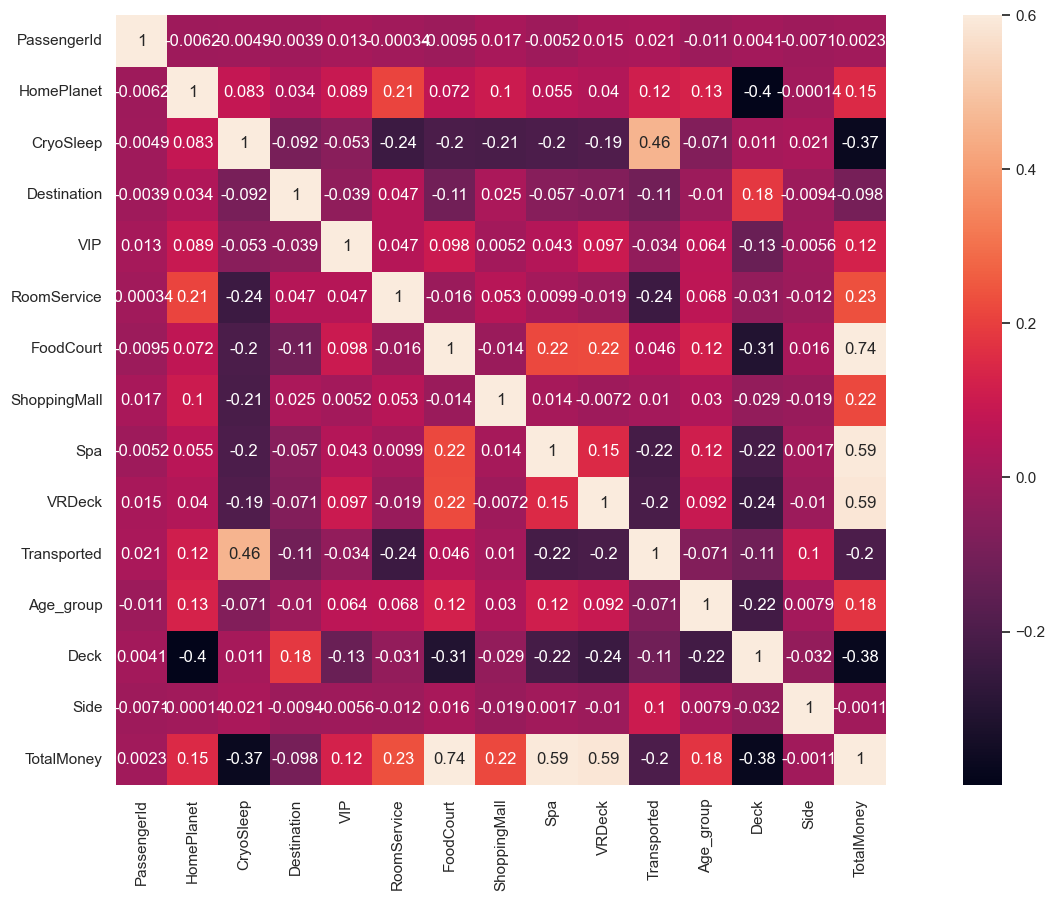

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(train1.corr(), vmax=0.6, square=True, annot=True)